<a href="https://colab.research.google.com/github/MayyarAA/ForecastingNeuralNetworks/blob/main/MSCI433A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import scipy
import pandas
import matplotlib.pyplot as plt
import sklearn    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')     

Mounted at /content/drive


In [5]:
!ls "/content/drive/My Drive/Colab Notebooks"

ClimateChange.csv  MSCI433A1.ipynb   pokemon_data_modified1.csv
demo1.ipynb	   pokemon_data.csv  StateData.csv


In [3]:
data1 = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/StateData.csv")
data1.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,West


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Population      50 non-null     int64  
 1   Income          50 non-null     int64  
 2   Illiteracy      50 non-null     float64
 3   LifeExp         50 non-null     float64
 4   Murder          50 non-null     float64
 5   HighSchoolGrad  50 non-null     float64
 6   Frost           50 non-null     int64  
 7   Area            50 non-null     int64  
 8   Longitude       50 non-null     float64
 9   Latitude        50 non-null     float64
 10  Region          50 non-null     object 
dtypes: float64(6), int64(4), object(1)
memory usage: 4.4+ KB


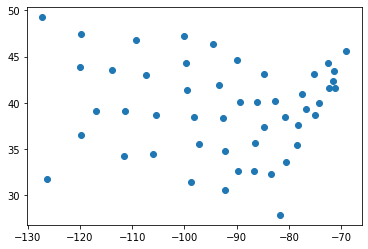

In [4]:
statedata = data1
#statedata['Region'] = pandas.to_pickle (statedata['Region'],errors='coerce')
#statedata.head()
plt.scatter(x=statedata["Longitude"],y=statedata["Latitude"])

In [5]:
regions_highschoolgradmean = statedata.groupby(by="Region").mean()
regions_highschoolgradmean

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude
Region,,,,,,,,,,
North Central,4803.000000,4611.083333,0.700000,71.766667,5.275000,54.516667,138.833333,62652.000,-92.562783,42.171567
Northeast,5495.111111,4570.222222,1.000000,71.264444,4.722222,53.966667,132.777778,18141.000,-72.756411,42.535956
South,4208.125000,4011.937500,1.737500,69.706250,10.581250,44.343750,64.625000,54605.125,-85.174487,34.610344
West,2915.307692,4702.615385,1.023077,71.234615,7.215385,62.000000,102.153846,134463.000,-114.988769,40.606854


In [6]:
#box plot for murder in each region 
statedata_region = statedata.groupby(by="Region").count();
statedata_region.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude
Region,,,,,,,,,,
North Central,12,12,12,12,12,12,12,12,12,12
Northeast,9,9,9,9,9,9,9,9,9,9
South,16,16,16,16,16,16,16,16,16,16
West,13,13,13,13,13,13,13,13,13,13


In [7]:
df_box = statedata_region.iloc[:,4]
df_box


Region
North Central    12
Northeast         9
South            16
West             13
Name: Murder, dtype: int64

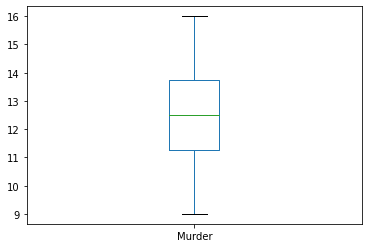

In [10]:
df_box.plot.box()

In [ ]:
#Question 2

In [8]:
# Question 2 climate change 
climatedata = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/ClimateChange.csv")
climatedata.head()
#climatedata.size

,Year,Month,MEI,CO2,CH4,N2O,CFC.11,CFC.12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [22]:
#split the data set into test and training data
X = climatedata.iloc[:,2:10]
Y = climatedata["Temp"]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33 )
X_train.size

1648

In [ ]:
X_test.size

In [23]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.7337196237427279


In [24]:
print("regr.coef_ ",regr.coef_  ," regr.intercept_ ",  regr.intercept_)

regr.coef_  [ 7.05922836e-02  4.29021173e-03  5.69834499e-04 -1.68559870e-02
 -7.49566288e-03  3.98146032e-03  9.10666361e-02 -1.70059471e+00]  regr.intercept_  -121.51590173417887
